## 1. pandas 개요
pandas는 데이타 분석(Data Analysis)을 위해 널리 사용되는 파이썬 라이브러리 패키지이다. pandas는 과학용 파이썬 배포판인 아나콘다(Anaconda)에 기본적으로 제공되지만, 아나콘다를 사용하지 않을 경우에는 pip install pandas 를 통해 설치할 수 있다. 이 아티클에서는 pandas의 기본적인 개념과 기초적인 샘플들을 소개한다.

## 2. pandas 사용법
pandas를 사용하기 위해서는 먼저 pandas를 아래와 같이 import 한다. pandas는 크게 세가지의 자료구조를 지원하고 있는데, 1차원 자료구조인 Series, 2차원 자료구조인 DataFrame, 그리고 3차원 자료구조인 Panel을 지원한다.

### Series
가장 간단한 1차원 자료구조인 Series는 배열/리스트와 같은 일련의 시퀀스 데이타를 받아들이는데, 별도의 인덱스 레이블을 지정하지 않으면 자동적으로 0부터 시작되는 디폴트 정수 인덱스를 사용한다.

In [1]:
import pandas as pd
 
data = [1, 3, 5, 7, 9]
s = pd.Series(data)
s

0    1
1    3
2    5
3    7
4    9
dtype: int64

### DataFrame
2차원 자료구조인 DataFrame는 행과 열이 있는 테이블 데이타(Tabular Data)를 받아들이는데, 아래 예제는 그 한가지 방법으로서 열(column)을 dict의 Key로, 행(row)을 dict의 Value로 한 Dictionary 데이타를 pd.DataFrame()을 사용하여 pandas의 Data Frame 자료구조로 변환한 예이다.

In [2]:
import pandas as pd
 
data = {
    'year': [2016, 2017, 2018],
    'GDP rate': [2.8, 3.1, 3.0],
    'GDP': ['1.637M', '1.73M', '1.83M']
}
 
df = pd.DataFrame(data)
df

,year,GDP rate,GDP
0,2016,2.8,1.637M
1,2017,3.1,1.73M
2,2018,3.0,1.83M


### 다중 인덱스(Panel)
행이나 열에 여러 계층을 가지는 인덱스 즉, 다중 인덱스(multi-index)를 설정할 수도 있다. 데이터프레임을 생성할 때 columns 인수에 다음 예제처럼 리스트의 리스트(행렬) 형태로 인덱스를 넣으면 다중 열 인덱스를 가지게 된다.


In [6]:
import pandas as pd
import numpy as np
np.random.seed(0)
df3 = pd.DataFrame(np.round(np.random.randn(5, 4), 2),
                   columns=[["A", "A", "B", "B"],
                            ["C1", "C2", "C1", "C2"]])
df3

A           B      
     C1    C2    C1    C2
0  1.76  0.40  0.98  2.24
1  1.87 -0.98  0.95 -0.15
2 -0.10  0.41  0.14  1.45
3  0.76  0.12  0.44  0.33
4  1.49 -0.21  0.31 -0.85

다중 인덱스는 이름을 지정하면 더 편리하게 사용할 수 있다. 열 인덱스들의 이름 지정은 columns 객체의 names 속성에 리스트를 넣어서 지정한다.

In [7]:
df3.columns.names = ["Cidx1", "Cidx2"]
df3

Cidx1     A           B      
Cidx2    C1    C2    C1    C2
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

마찬가지로 데이터프레임을 생성할 때 index 인수에 리스트의 리스트(행렬) 형태로 인덱스를 넣으면 다중 (행) 인덱스를 가진다. 행 인덱스들의 이름 지정은 index 객체의 names 속성에 리스트를 넣어서 지정한다.

In [8]:
np.random.seed(0)
df4 = pd.DataFrame(np.round(np.random.randn(6, 4), 2),
                   columns=[["A", "A", "B", "B"],
                            ["C", "D", "C", "D"]],
                   index=[["M", "M", "M", "F", "F", "F"],
                          ["id_" + str(i + 1) for i in range(3)] * 2])
df4.columns.names = ["Cidx1", "Cidx2"]
df4.index.names = ["Ridx1", "Ridx2"]
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

### 행 인덱스와 열 인덱스 교환
**``stack``** 명령이나 **``unstack``** 명령을 쓰면 열 인덱스를 행 인덱스로 바꾸거나 반대로 행 인덱스를 열 인덱스로 바꿀 수 있다.

 - **``stack()``**

  - 열 인덱스 -> 행 인덱스로 변환

- **``unstack()``**

  - 행 인덱스 -> 열 인덱스로 변환

**``stack``** 명령을 실행하면 열 인덱스가 반시계 방향으로 90도 회전한 것과 비슷한 모양이 된다. 마찬가지로 **``unstack``** 명령을 실행하면 행 인덱스가 시계 방향으로 90도 회전한 것과 비슷하다. 인덱스를 지정할 때는 문자열 이름과 순서를 표시하는 숫자 인덱스를 모두 사용할 수 있다.

In [9]:
df4.stack("Cidx1")

Cidx2                 C     D
Ridx1 Ridx2 Cidx1            
M     id_1  A      1.76  0.40
            B      0.98  2.24
      id_2  A      1.87 -0.98
            B      0.95 -0.15
      id_3  A     -0.10  0.41
            B      0.14  1.45
F     id_1  A      0.76  0.12
            B      0.44  0.33
      id_2  A      1.49 -0.21
            B      0.31 -0.85
      id_3  A     -2.55  0.65
            B      0.86 -0.74

In [10]:
df4.stack(1)

Cidx1                 A     B
Ridx1 Ridx2 Cidx2            
M     id_1  C      1.76  0.98
            D      0.40  2.24
      id_2  C      1.87  0.95
            D     -0.98 -0.15
      id_3  C     -0.10  0.14
            D      0.41  1.45
F     id_1  C      0.76  0.44
            D      0.12  0.33
      id_2  C      1.49  0.31
            D     -0.21 -0.85
      id_3  C     -2.55  0.86
            D      0.65 -0.74

In [11]:
df4.unstack("Ridx2")

Cidx1     A                                   B                              
Cidx2     C                 D                 C                 D            
Ridx2  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3
Ridx1                                                                        
F      0.76  1.49 -2.55  0.12 -0.21  0.65  0.44  0.31  0.86  0.33 -0.85 -0.74
M      1.76  1.87 -0.10  0.40 -0.98  0.41  0.98  0.95  0.14  2.24 -0.15  1.45

In [12]:
df4.unstack(0)

Cidx1     A                       B                  
Cidx2     C           D           C           D      
Ridx1     F     M     F     M     F     M     F     M
Ridx2                                                
id_1   0.76  1.76  0.12  0.40  0.44  0.98  0.33  2.24
id_2   1.49  1.87 -0.21 -0.98  0.31  0.95 -0.85 -0.15
id_3  -2.55 -0.10  0.65  0.41  0.86  0.14 -0.74  1.45

### 다중 인덱스가 있는 경우의 인덱싱
데이터프레임이 다중 인덱스를 가지는 경우에는 인덱스가 하나의 라벨이나 숫자가 아니라 **``()``**로 둘러싸인 튜플이 되어야 한다. 예를 들어 앞에서 만든 **``df3``** 데이터프레임의 경우 다음과 같이 인덱싱할 수 있다.

In [13]:
df3

Cidx1     A           B      
Cidx2    C1    C2    C1    C2
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

In [14]:
df3[("B", "C1")]

0    0.98
1    0.95
2    0.14
3    0.44
4    0.31
Name: (B, C1), dtype: float64

In [15]:
df3.loc[0, ("B", "C1")]

0.98

In [16]:
df3.loc[0, ("B", "C1")] = 100
df3

Cidx1     A             B      
Cidx2    C1    C2      C1    C2
0      1.76  0.40  100.00  2.24
1      1.87 -0.98    0.95 -0.15
2     -0.10  0.41    0.14  1.45
3      0.76  0.12    0.44  0.33
4      1.49 -0.21    0.31 -0.85

## 3. 데이타 엑세스
pandas에서 Series, DataFrame, Panel 등의 자료구조를 만든 후, 다양한 방법을 통해 데이타를 엑세스할 수 있다.
가장 간단한 방식으로 pandas 자료구조에 대해 인덱싱 혹은 속성(Attribute)을 사용하는 것인데, 예를 들어 위에서 생성한 DataFrame인 df 에 대해 year 행을 가져오기 위해 df["year"] 혹은 df.year 를 사용할 수 있다. 또한, 부울린 인덱싱 (boolean indexing)을 사용하여 특정 조건의 데이타만 필터링 할 수도 있는데, df[df['year'] > 2016]은 2016년 초과인 데이타만 필터링해서 표시한다.

데이타량이 많은 경우는 df.head() 함수를 사용하면 처음 5개 row를 표시해 주며, df.tail() 함수를 사용하면 마찬가지로 마지막 5개 row를 표시해 준다.

In [17]:
df['year'] # df.year 과 동일

0    2016
1    2017
2    2018
Name: year, dtype: int64

In [18]:
df.year

0    2016
1    2017
2    2018
Name: year, dtype: int64

In [19]:
df[df['year'] > 2016] # boolean indexing

,year,GDP rate,GDP
1,2017,3.1,1.73M
2,2018,3.0,1.83M


In [20]:
sum = df['GDP rate'].sum()
avg = df['GDP rate'].mean()
print("sum = {}, avg = {}".format(sum,avg))

sum = 8.9, avg = 2.966666666666667


In [21]:
df.describe()

,year,GDP rate
count,3.0,3.000000
mean,2017.0,2.966667
std,1.0,0.152753
min,2016.0,2.800000
25%,2016.5,2.900000
50%,2017.0,3.000000
75%,2017.5,3.050000
max,2018.0,3.100000


pandas는 데이타에 대한 다양한 연산 함수들을 제공하고 있는데, 예를 들어 합계 구하는 sum(), 평균을 구하는 mean(), 최소를 구하는 min(), 최대를 구하는 max() 등을 사용할 수 있다. 또한, 위 그림에서 보듯이, 기본적인 통계치를 모두 표시하기 위해 describe() 함수를 사용할 수 있다.

## 4. 외부 데이타 읽고 쓰기
pandas는 CSV 파일, 텍스트 파일, 엑셀 파일, SQL 데이타베이스, HDF5 포맷 등 다양한 외부 리소스에 데이타를 읽고 쓸 수 있는 기능을 제공한다. 아래 예제는 엑셀 파일파일로부터 데이타를 읽어 오는 기능을 예시한 것이다.

In [23]:
import pandas as pd

df = pd.read_excel('data/score.xlsx')

In [24]:
df

,ID,국어,영어,수학
0,1,88,92,95
1,2,91,89,95
2,3,98,82,90


그리고, CSV 파일을 읽고 쓰기 위해서는 아래와 같이 read_csv() 와 to_csv() 함수를 사용할 수 있다.

In [25]:
csv_df = pd.read_csv('data/score_csv.csv') # csv 읽기
csv_df.to_csv('data/output.csv')  # csv 쓰기

In [26]:
csv_df

,ID,국어,영어,수학
0,1,88,92,95
1,2,91,89,95
2,3,98,82,90


아래 예제는 CSV 파일 데이타를 pandas를 통해 읽어 들인 후, matplotlib 을 통해 Bar 차트를 그리는 예이다.

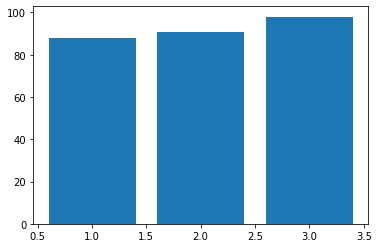

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(csv_df.ID, csv_df['국어'])
plt.show()